# CO2 Emissions


![my image caption](img.jpg)


## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# Preview the dataframe
cars.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)  
0         Z                               8.5                  196  
1         Z                               9.6                  221  
2         Z                               5.9                  136  
3         Z                              11.1                  255  
4         Z                              10.6                  244

To begin with, let's carry out a number of standard operations with data and see if there are missing values, what data format, whether there are data that are out of understanding

In [2]:
cars.columns = cars.columns.map(lambda x: x.replace(" ", "_"))
cars['Fuel_Type'] = cars['Fuel_Type'].replace("X", "Regular")
cars['Fuel_Type'] = cars['Fuel_Type'].replace("Z", "Premium")
cars['Fuel_Type'] = cars['Fuel_Type'].replace("D", "Diesel")
cars['Fuel_Type'] = cars['Fuel_Type'].replace("E", "Ethanol")
cars['Fuel_Type'] = cars['Fuel_Type'].replace("N", "Gas")

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle_Class                     7385 non-null   object 
 3   Engine_Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel_Type                         7385 non-null   object 
 7   Fuel_Consumption_Comb_(L/100_km)  7385 non-null   float64
 8   CO2_Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [3]:
cars.isna().sum()

Make                                0
Model                               0
Vehicle_Class                       0
Engine_Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel_Type                           0
Fuel_Consumption_Comb_(L/100_km)    0
CO2_Emissions(g/km)                 0
dtype: int64

In [4]:
cars.describe()

Engine_Size(L)    Cylinders  Fuel_Consumption_Comb_(L/100_km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         10.975071   
std          1.354170     1.828307                          2.892506   
min          0.900000     3.000000                          4.100000   
25%          2.000000     4.000000                          8.900000   
50%          3.000000     6.000000                         10.600000   
75%          3.700000     6.000000                         12.600000   
max          8.400000    16.000000                         26.100000   

       CO2_Emissions(g/km)  
count          7385.000000  
mean            250.584699  
std              58.512679  
min              96.000000  
25%             208.000000  
50%             246.000000  
75%             288.000000  
max             522.000000

In [5]:
cars['Model'] =cars.Model.apply(lambda x: x.lower())
cars['Make'] =cars.Make.apply(lambda x: x.lower())
cars['Vehicle_Class'] =cars.Vehicle_Class.apply(lambda x: x.lower())
cars['Transmission'] =cars.Transmission.apply(lambda x: x.lower())


In [6]:
cars[cars.duplicated()]

Make       Model          Vehicle_Class  Engine_Size(L)  \
1075         acura     rdx awd            suv - small             3.5   
1076         acura         rlx               mid-size             3.5   
1081    alfa romeo          4c             two-seater             1.8   
1082  aston martin         db9            minicompact             5.9   
1084  aston martin  v8 vantage             two-seater             4.7   
...            ...         ...                    ...             ...   
7365    volkswagen    golf gti                compact             2.0   
7366    volkswagen       jetta                compact             1.4   
7367    volkswagen       jetta                compact             1.4   
7368    volkswagen   jetta gli                compact             2.0   
7377         volvo  v60 t6 awd  station wagon - small             2.0   

      Cylinders Transmission Fuel_Type  Fuel_Consumption_Comb_(L/100_km)  \
1075          6          as6   Premium                              10.6   
1076          6          as6   Premium                              10.0   
1081          4          am6   Premium                               8.4   
1082         12           a6   Premium                              15.6   
1084          8          am7   Premium                              14.7   
...         ...          ...       ...                               ...   
7365          4           m6   Regular                               8.7   
7366          4          as8   Regular                               7.0   
7367          4           m6   Regular                               7.0   
7368          4          am7   Regular                               8.4   
7377          4          as8   Premium                               9.4   

      CO2_Emissions(g/km)  
1075                  244  
1076                  230  
1081                  193  
1082                  359  
1084                  338  
...                   ...  
7365                  203  
7366                  162  
7367                  163  
7368                  196  
7377                  219  

[1636 rows x 9 columns]

In [7]:
cars.drop_duplicates(inplace = True)

In [8]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(cars.columns):
    variables.loc[i] = [var, cars[var].nunique(), cars[var].unique().tolist()]
variables.set_index('Variable', inplace=True)    
variables

Number of unique values  \
Variable                                                    
Make                                                   42   
Model                                                1596   
Vehicle_Class                                          16   
Engine_Size(L)                                         51   
Cylinders                                               8   
Transmission                                           27   
Fuel_Type                                               5   
Fuel_Consumption_Comb_(L/100_km)                      181   
CO2_Emissions(g/km)                                   331   

                                                                             Values  
Variable                                                                             
Make                              [acura, alfa romeo, aston martin, audi, bentle...  
Model                             [ilx, ilx hybrid, mdx 4wd, rdx awd, rlx, tl, t...  
Vehicle_Class                     [compact, suv - small, mid-size, two-seater, m...  
Engine_Size(L)                    [2.0, 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3.0, ...  
Cylinders                                               [4, 6, 12, 8, 10, 3, 5, 16]  
Transmission                      [as5, m6, av7, as6, am6, a6, am7, av8, as8, a7...  
Fuel_Type                                  [Premium, Diesel, Regular, Ethanol, Gas]  
Fuel_Consumption_Comb_(L/100_km)  [8.5, 9.6, 5.9, 11.1, 10.6, 10.0, 10.1, 11.6, ...  
CO2_Emissions(g/km)               [196, 221, 136, 255, 244, 230, 232, 267, 212, ...

At first glance , the data is clean and without missing values . In the course of answering the questions of reviewing this data, if we have missed something, we will definitely understand it


## We will answer the questions posed in this case study

Let's answer the first question.
## What is the average engine capacity in liters ?

In [9]:
mean_V_per_L = cars['Engine_Size(L)'].mean().round(1)
median_V_per_L = cars['Engine_Size(L)'].median().round(1)

print('The mean engine size in liter = {}'.format(mean_V_per_L))
print('The median engine size in liter = {}'.format(median_V_per_L))

The mean engine size in liter = 3.2
The median engine size in liter = 3.0


### As we can see , the average engine capacity of 5749 cars is more than 3 liters !

Let's move on to the second question.
## What is the average fuel consumption for regular gasoline?

In [10]:
mean_fuel = cars.groupby(['Fuel_Type'])\
				.agg({'Fuel_Consumption_Comb_(L/100_km)':'mean'})\
			    .reset_index().round(2)

<Figure size 1500x700 with 0 Axes>

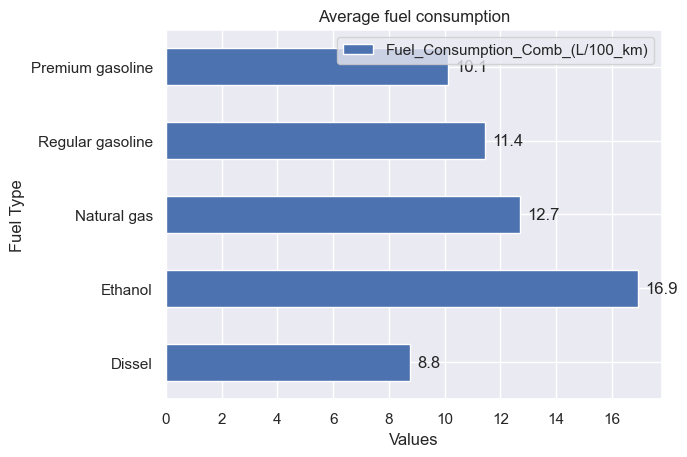

In [11]:
sns.set()

values = list(mean_fuel['Fuel_Consumption_Comb_(L/100_km)'])
y_labels = ['Dissel','Ethanol', 'Natural gas','Regular gasoline','Premium gasoline']
plt.figure(figsize=(15, 7))
ax = mean_fuel.plot(kind='barh');

ax.set_title('Average fuel consumption')
ax.set_xlabel('Values')
ax.set_ylabel('Fuel Type')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.1f}".format(x_value)

    plt.annotate(
        label,                      
        (x_value, y_value),    
        xytext=(space, 0),         
        textcoords="offset points", 
        va='center',                
        ha=ha)  
    
plt.show();

#### We see that the maximum consumption of cars running on ethanol, and the minimum on diesel.

The next question was:
 ### What is the correlation between fuel consumption and CO2 emissions?

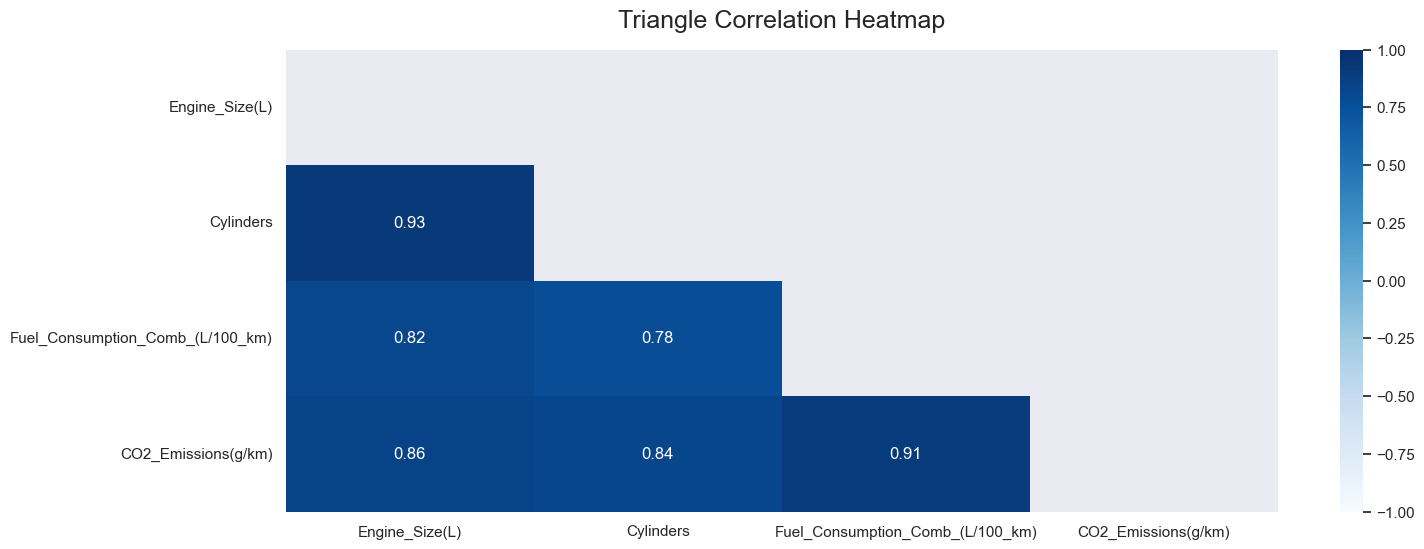

In [12]:

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(cars.corr(), dtype=np.bool))
heatmap = sns.heatmap(cars.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [13]:
corr_val = cars[['Fuel_Consumption_Comb_(L/100_km)','CO2_Emissions(g/km)']].corr()['Fuel_Consumption_Comb_(L/100_km)'][1].round(2)
print('The correlation between fuel consumption and CO2 emissions  = {}'.format(corr_val))

The correlation between fuel consumption and CO2 emissions  = 0.91


## As we can see, the correlation between these values is very strong. This means that CO2 emissions directly depend on the amount of fuel consumed.

The next question was:

### Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

In [14]:
fuel_co2 = cars.groupby(['Vehicle_Class'])\
			   .agg({'Fuel_Consumption_Comb_(L/100_km)':'mean','CO2_Emissions(g/km)':'mean'})\
			   .reset_index().round(2)


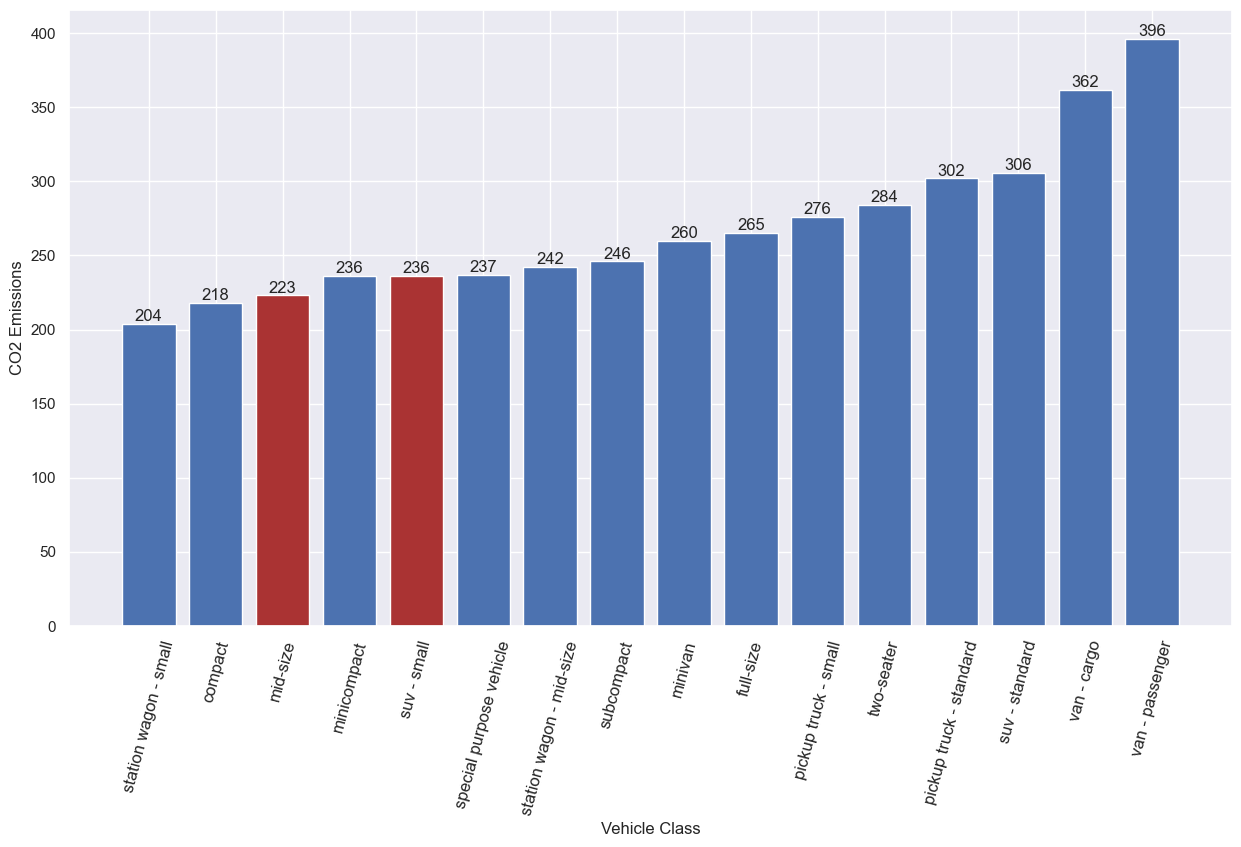

In [15]:
sns.set()
df = fuel_co2.round(0).sort_values('CO2_Emissions(g/km)',ascending=True)
n = list(df['Vehicle_Class'])
s = list(df['CO2_Emissions(g/km)'].astype(int))
plt.figure(figsize=(15, 8))
plt.xticks(rotation=75, fontsize=12); 
ax = plt.bar(n,s)
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions')

for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')      

pos2 = df.index.get_loc(2)
pos11 = df.index.get_loc(11)

ax.patches[pos2].set_facecolor('#aa3333')
ax.patches[pos11].set_facecolor('#aa3333')

plt.show()


## As we can see from the graph that CO2 emissions are slightly higher for a class car SUV - SMALL


In [16]:
mean_CO2 = cars['CO2_Emissions(g/km)'].mean().round(0)
print("The average CO2 emissions for all vehicles = {}".format(int(mean_CO2)))

The average CO2 emissions for all vehicles = 252


Next, we will answer the 5th question from our assignment
### What are the average CO2 emissions for all vehicles? 


### For vehicles with an engine size of 2.0 liters or smaller?

In [17]:

cars_less_2l = cars[cars['Engine_Size(L)'] <= 2]
cars_less_2l_mean= cars_less_2l.groupby(['Engine_Size(L)'])\
 				 .agg({'Fuel_Consumption_Comb_(L/100_km)':'mean','CO2_Emissions(g/km)':'mean'})\
				 .reset_index().round(2).sort_values('Engine_Size(L)')
cars_less_2l_mean

Engine_Size(L)  Fuel_Consumption_Comb_(L/100_km)  CO2_Emissions(g/km)
0             0.9                              6.83               155.33
1             1.0                              7.10               165.06
2             1.2                              6.54               151.67
3             1.3                              8.29               193.14
4             1.4                              7.92               184.51
5             1.5                              7.51               175.30
6             1.6                              8.04               188.33
7             1.8                              7.74               179.94
8             2.0                              9.04               210.05

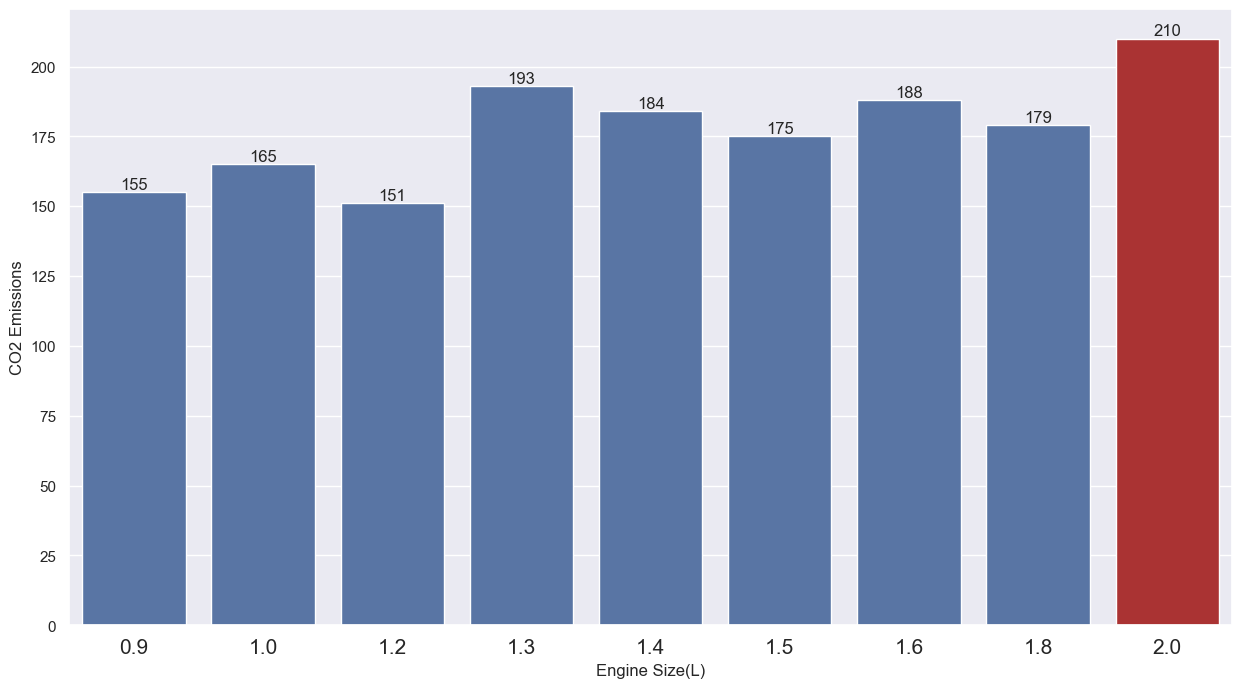

In [18]:
n1 = list(cars_less_2l_mean['Engine_Size(L)'])
s1 = list(cars_less_2l_mean['CO2_Emissions(g/km)'].astype(int))
plt.figure(figsize=(15, 8))
plt.xticks(n1,fontsize=15)
ax = sns.barplot(x = n1,y = s1, color = 'b')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions')
pos8 = cars_less_2l_mean.index.get_loc(8)
ax.patches[pos8].set_facecolor('#aa3333')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

As we can see from the barplot above that CO2 emissions for cars with a two-liter engine are 210 g/km, this is the highest figure for cars with a 2-liter engine and below. From this graph, the second largest indication will be for a 1.3-liter engine, of course, here you need to look at the cars themselves and what kind of environmental class they are.

### From this data, you can get much more information than there is in the task, so the question is: What other ideas do you have? I would give more complete information on this data set.

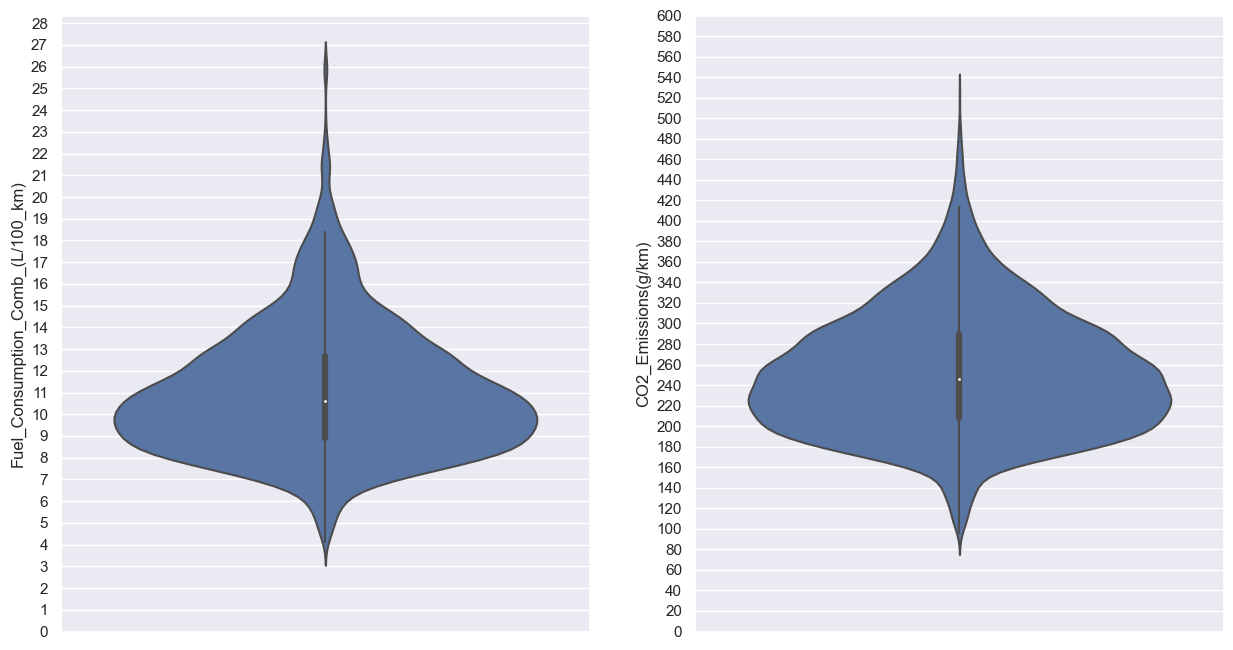

In [19]:
fig, axes = plt.subplots(1,2,  figsize=(15,8))
sns.violinplot(y=cars['Fuel_Consumption_Comb_(L/100_km)'],ax= axes[0]);
sns.violinplot(y=cars['CO2_Emissions(g/km)'],ax= axes[1]);
axes[0].set_yticks(np.linspace(-0, 28, 29))

axes[1].set_yticks(np.linspace(-0, 600, 31))
plt.show()

We saw that the emissions are mostly distributed between 160 and 340 g/l and the fuel consumption distribution is from 7 to 15 =l/100km.

### I would look at which is the most eco-friendly brand of cars and which cars have the highest CO2 and the lowest.

In [20]:
cars[cars['CO2_Emissions(g/km)'] <= 100]

Make       Model Vehicle_Class  Engine_Size(L)  Cylinders  \
3824  hyundai  ioniq blue     full-size             1.6          4   
6949  hyundai       ioniq     full-size             1.6          4   

     Transmission Fuel_Type  Fuel_Consumption_Comb_(L/100_km)  \
3824          am6   Regular                               4.1   
6949          am6   Regular                               4.2   

      CO2_Emissions(g/km)  
3824                   96  
6949                   99

In [21]:
cars[cars['CO2_Emissions(g/km)'] >= 470]

Make               Model    Vehicle_Class  Engine_Size(L)  \
349            ford          e350 wagon  van - passenger             6.8   
2971  mercedes-benz            amg g 65   suv - standard             6.0   
4509        bugatti              chiron       two-seater             8.0   
5126  mercedes-benz            amg g 65   suv - standard             6.0   
6045    lamborghini     aventador coupe       two-seater             6.5   
6046    lamborghini  aventador roadster       two-seater             6.5   
7058    lamborghini     aventador coupe       two-seater             6.5   

      Cylinders Transmission Fuel_Type  Fuel_Consumption_Comb_(L/100_km)  \
349          10           a5   Regular                              21.2   
2971         12          as7   Premium                              21.4   
4509         16          am7   Premium                              22.2   
5126         12           a7   Premium                              20.3   
6045         12          am7   Premium                              21.5   
6046         12          am7   Premium                              21.7   
7058         12          am7   Premium                              21.4   

      CO2_Emissions(g/km)  
349                   488  
2971                  476  
4509                  522  
5126                  473  
6045                  487  
6046                  493  
7058                  485

Sports cars have high fuel consumption and CO2 emissions. It can be seen that the number of cylinders in these engines starts from 10 and above, and the engine capacity starts from 6 liters.



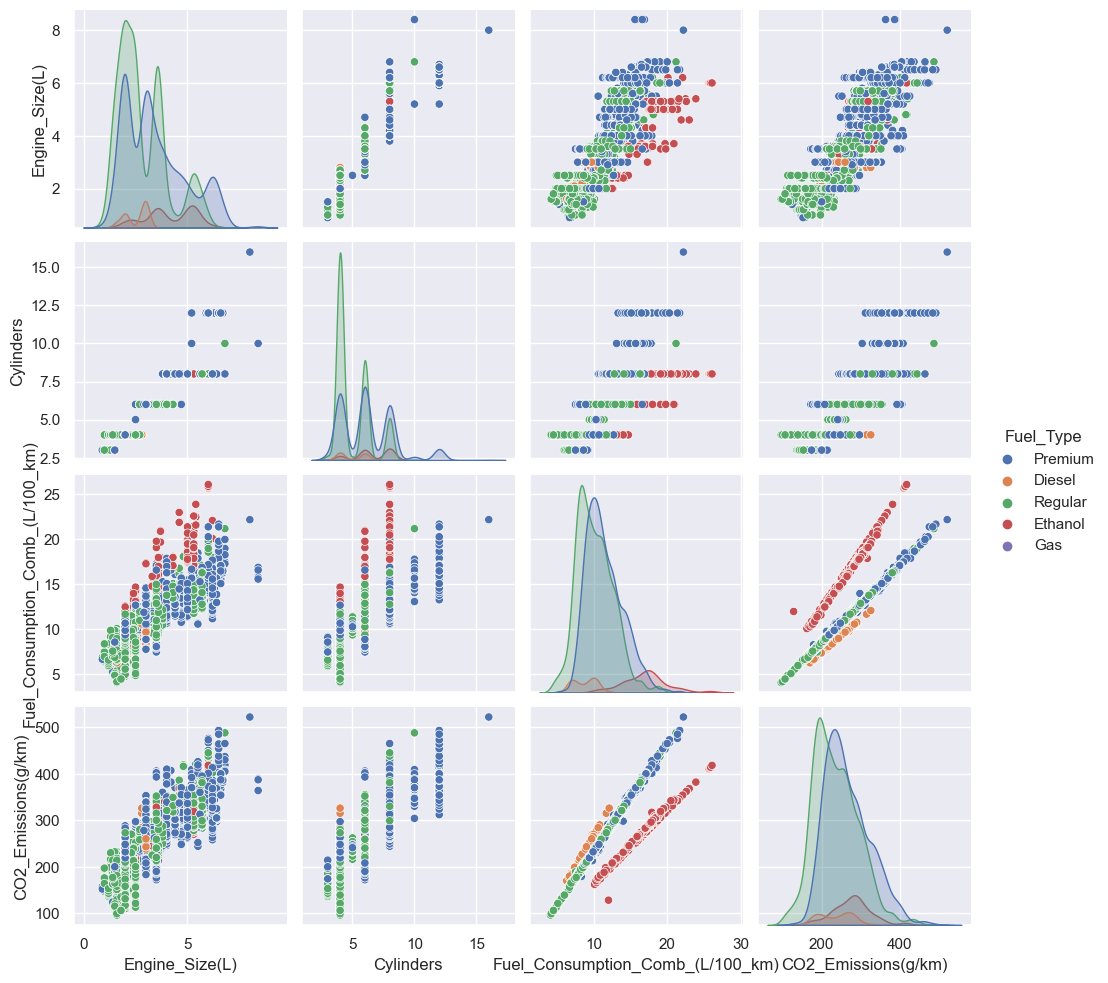

In [22]:
sns.pairplot(cars,hue ='Fuel_Type');

As the number of cylinders increase, the CO2 emissions increase
Cars with 8 and less than 8 cylinders prefer using Fuel Type regular which result in less emissions of CO2
Fuel Type Premium gasoline results in more CO2 emissions than the other

Bugatti have a  emit the most CO2 per car

Model Bugatti Chiron is amongst the most CO2 emitting car model

 Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2

Cars using Fuel Type Ethanol are emitting the most CO2

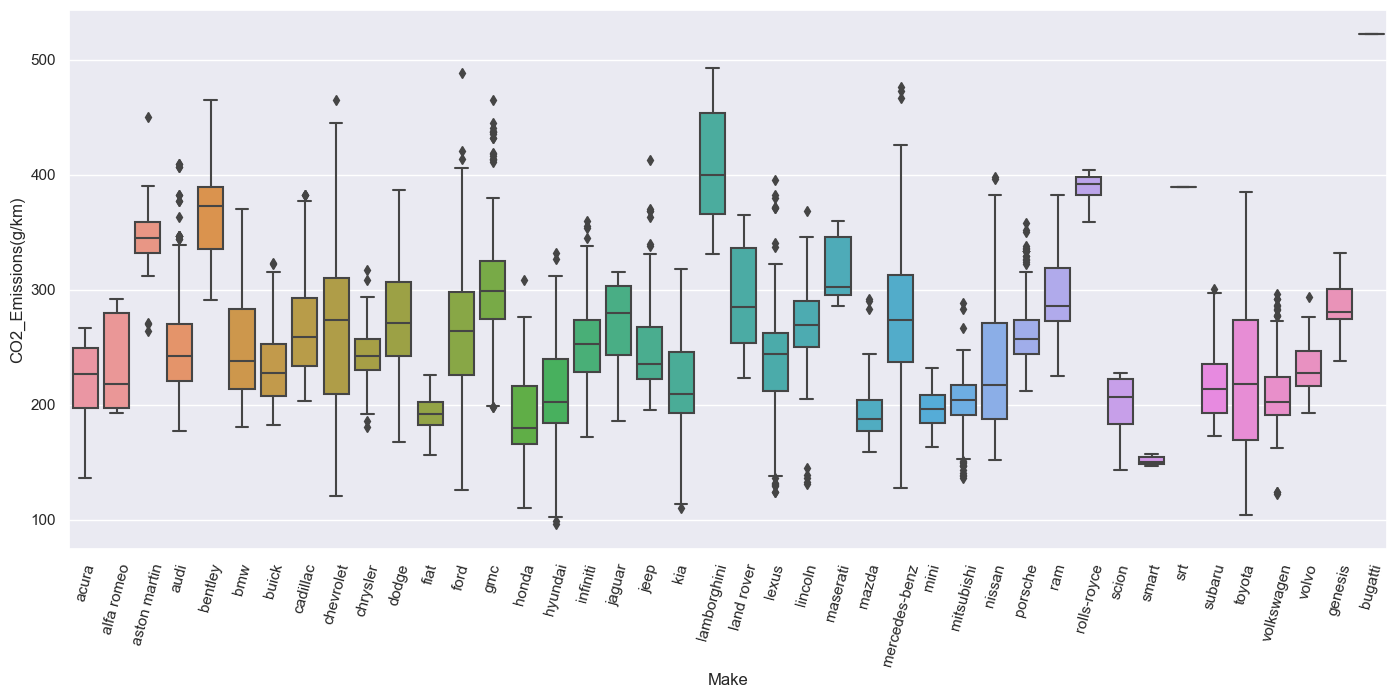

In [23]:
plt.figure(figsize = (17,7))
sns.boxplot(x="Make", y='CO2_Emissions(g/km)', data=cars)
plt.xticks(rotation = 75)
plt.show()

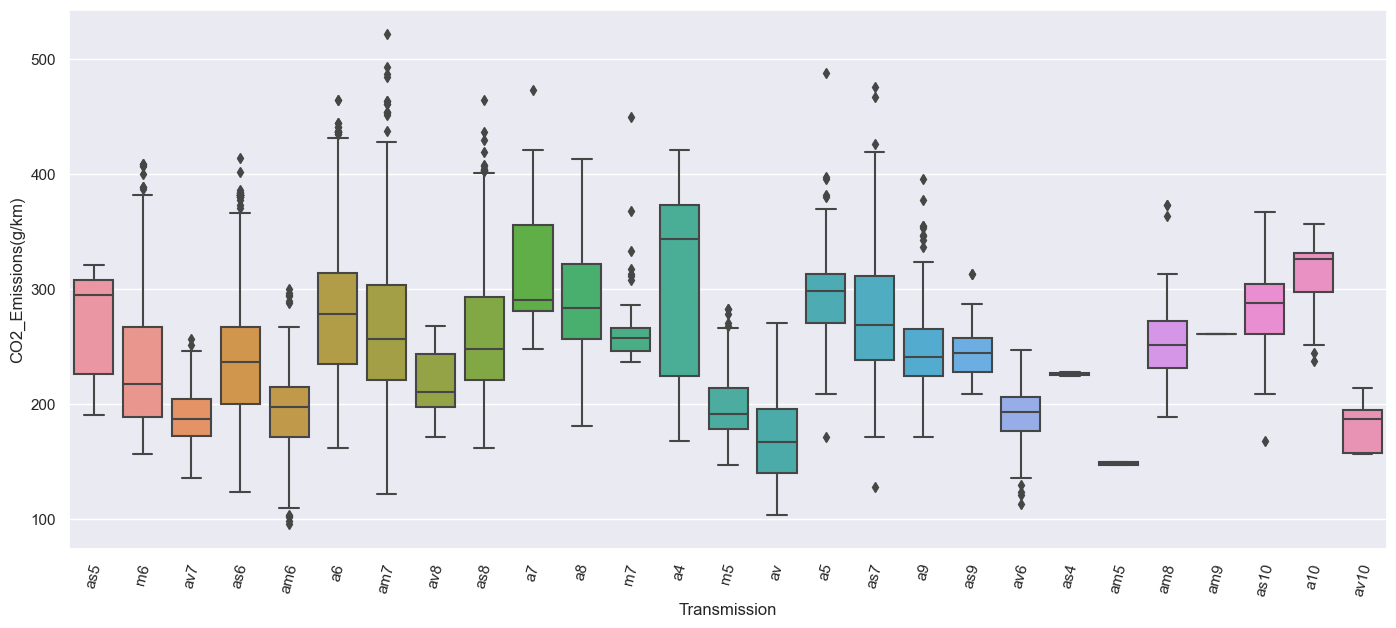

In [24]:
plt.figure(figsize = (17,7))
sns.boxplot(x="Transmission", y='CO2_Emissions(g/km)', data=cars)
plt.xticks(rotation = 75)
plt.show()

In [25]:
import plotly.express as px
fig = px.pie(cars['Cylinders'].value_counts().reset_index(), values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()


We can still try to generalize the data, for example, the gearbox can be divided into a smaller number of groups, for example manual, automatic, variator and automatic with the possibility of manual adjustment. Also try to keep track of which class the brands are conditionally sports, family and so on. There are a lot of opportunities to play with data, but basically it will all be needed, for example, to build forecasts of co2 emissions.

## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## A note on SQL
You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

It is also important to note that the database used in this challenge is a slightly different version (SQL Server) from the one used in the Introduction to SQL course (PostgreSQL). You might notice that the keyword **LIMIT** does not exist in SQL Server.

In [26]:
SELECT * 
FROM products;

product_id                          product_name  brand_id  category_id  \
0             1                       Trek 820 - 2016         9            6   
1             2    Ritchey Timberwolf Frameset - 2016         5            6   
2             3       Surly Wednesday Frameset - 2016         8            6   
3             4              Trek Fuel EX 8 29 - 2016         9            6   
4             5          Heller Shagamaw Frame - 2016         3            6   
..          ...                                   ...       ...          ...   
316         317          Trek Checkpoint ALR 5 - 2019         9            7   
317         318  Trek Checkpoint ALR 5 Women's - 2019         9            7   
318         319   Trek Checkpoint SL 5 Women's - 2019         9            7   
319         320           Trek Checkpoint SL 6 - 2019         9            7   
320         321   Trek Checkpoint ALR Frameset - 2019         9            7   

     model_year  list_price  
0          2016      379.99  
1          2016      749.99  
2          2016      999.99  
3          2016     2899.99  
4          2016     1320.99  
..          ...         ...  
316        2019     1999.99  
317        2019     1999.99  
318        2019     2799.99  
319        2019     3799.99  
320        2019     3199.99  

[321 rows x 6 columns]

In [27]:
SELECT * FROM brands;

brand_id    brand_name
0         1       Electra
1         2          Haro
2         3        Heller
3         4   Pure Cycles
4         5       Ritchey
5         6       Strider
6         7  Sun Bicycles
7         8         Surly
8         9          Trek

In [28]:
SELECT * FROM categories

category_id        category_name
0            1    Children Bicycles
1            2     Comfort Bicycles
2            3    Cruisers Bicycles
3            4  Cyclocross Bicycles
4            5       Electric Bikes
5            6       Mountain Bikes
6            7           Road Bikes

## What is the most expensive item your company sells? 
The least expensive? 

In [29]:
select * from products
where list_price in (select MAX(list_price) from products) 
OR list_price in(select MIN(list_price) from products)

product_id                            product_name  brand_id  category_id  \
0         155           Trek Domane SLR 9 Disc - 2018         9            7   
1         263  Strider Classic 12 Balance Bike - 2018         6            1   

   model_year  list_price  
0        2018    11999.99  
1        2018       89.99

### As we can see, the smallest price is 90 and the maximum is 12 thousand dollars

## How many different products of each category does your company sell?

In [30]:
select c.category_name, count(p.category_id) as product_count 
from categories as c
inner  join products as p
on c.category_id = p.category_id
group by c.category_name
order by product_count desc

category_name  product_count
0    Cruisers Bicycles             78
1       Mountain Bikes             60
2           Road Bikes             60
3    Children Bicycles             59
4     Comfort Bicycles             30
5       Electric Bikes             24
6  Cyclocross Bicycles             10

## What are the top three brands with the highest average list price? The top three categories?

In [31]:
select top 3 b.brand_name, round(avg(p.list_price),0) as mean_price 
from brands as b
inner  join products as p
on b.brand_id = p.category_id
group by b.brand_name
order by mean_price desc


brand_name  mean_price
0       Ritchey        3282
1  Sun Bicycles        3175
2   Pure Cycles        2543

In [32]:
select  b.brand_name, round(sum(p.list_price),0) as sum_price 
from brands as b
inner  join products as p
on b.brand_id = p.category_id
group by b.brand_name
order by sum_price desc


brand_name  sum_price
0  Sun Bicycles     190521
1       Strider      98985
2       Ritchey      78760
3        Heller      56972
4   Pure Cycles      25428
5          Haro      20464
6       Electra      16979